## Data importing and splitting

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("train_emotion.csv")

In [8]:
data.head(10)

,text,emotion
0,Yeah for coupons! Found this place randomly ...,neutral
1,i still love to feel a gentle breeze and hear ...,happiness
2,"Normal, fama devido ao programa de tv. A sobre...",neutral
3,im feeling a little less jaded,sadness
4,i have never shaken the feeling of ferocious p...,hate
5,i figure my family loves us no matter what but...,sadness
6,i feel uncertain i will raise my,worry
7,i was feeling relaxed and quite comfortable at...,fun
8,i feel like ive lost everything and everyone,sadness
9,i feel this way is probably because i am dumb ...,sadness


In [9]:
X = data["text"]
y = data["emotion"]

In [10]:
y.value_counts() #relatively balanced dataset, the surpise emotion is the least populated one

happiness    1468
neutral      1292
worry        1222
fun          1157
sadness      1146
hate         1143
surprise      572
Name: emotion, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=52
)

In [12]:
len(X_train)

6400

In [13]:
len(X_test)

1600

### Label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [15]:
#y_train = y_train_enc
#y_test = y_test_enc
y_train

7011          fun
5480    happiness
3940    happiness
6642      sadness
823       neutral
          ...    
3519          fun
819           fun
2335    happiness
330     happiness
886       neutral
Name: emotion, Length: 6400, dtype: object

## First vectorization methods and models

In [16]:
from sklearn.metrics import accuracy_score, recall_score, classification_report

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import FunctionTransformer

In [18]:
def model_evaluation(pipeline):
    y_pred = pipeline.predict(X_test)
    print("\n Model Performance:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    return accuracy

# Multinomial Naive Bayes with various vectorization techniques

## BOW - bag of words
Counts the number of times each word appears in a document.
<li>lots of dimensions</li>
<li>Simple, easy to understand.</li>
<li>ignores word order, context, and meaning</li>

In [19]:
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

bow_pipeline.fit(X_train, y_train)
num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
print("Number of features: ", num_features)

model_evaluation(bow_pipeline)

Number of features:  14101

 Model Performance:
              precision    recall  f1-score   support

         fun       0.84      0.55      0.66       231
   happiness       0.58      0.95      0.72       294
        hate       0.80      0.68      0.73       229
     neutral       0.78      1.00      0.88       258
     sadness       0.85      0.59      0.70       229
    surprise       0.93      0.12      0.22       115
       worry       0.71      0.79      0.75       244

    accuracy                           0.72      1600
   macro avg       0.79      0.67      0.66      1600
weighted avg       0.77      0.72      0.70      1600

Accuracy: 0.724375


0.724375

## N-grams
Considers sequences of n words to capture more context.
<li>Captures simple word combinations
<li>High dimensionality

In [20]:
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 3))),
    ('classifier', MultinomialNB())
])

bow_pipeline.fit(X_train, y_train)

num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
print("Number of features: ", num_features)

model_evaluation(bow_pipeline)

Number of features:  285115

 Model Performance:
              precision    recall  f1-score   support

         fun       0.58      0.27      0.37       231
   happiness       0.45      0.68      0.54       294
        hate       0.56      0.36      0.44       229
     neutral       0.50      1.00      0.67       258
     sadness       0.54      0.35      0.42       229
    surprise       0.80      0.17      0.29       115
       worry       0.56      0.49      0.52       244

    accuracy                           0.51      1600
   macro avg       0.57      0.48      0.46      1600
weighted avg       0.55      0.51      0.48      1600

Accuracy: 0.514375


0.514375

## Experimenting with ngram_ranges

In [26]:
for i in range (1,5):
    for j in range(1,6):
        if i > j:
            continue
        bow_pipeline = Pipeline([
            ('vectorizer', CountVectorizer(ngram_range=(i, j))),
            ('classifier', MultinomialNB())
        ])
        
        bow_pipeline.fit(X_train, y_train)
        
        print(f"for ngram_range=({i},{j})")
        model_evaluation(bow_pipeline)
        print("")
        print("")
        print("")


for ngram_range=(1,1)

 Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.55      0.66       231
           1       0.58      0.95      0.72       294
           2       0.80      0.68      0.73       229
           3       0.78      1.00      0.88       258
           4       0.85      0.59      0.70       229
           5       0.93      0.12      0.22       115
           6       0.71      0.79      0.75       244

    accuracy                           0.72      1600
   macro avg       0.79      0.67      0.66      1600
weighted avg       0.77      0.72      0.70      1600

Accuracy: 0.724375



for ngram_range=(1,2)

 Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.30      0.45       231
           1       0.50      0.81      0.62       294
           2       0.80      0.45      0.58       229
           3       0.43      1.00      0.60       258
           4       0.84 

for ngram_range=(4,5)

 Model Performance:
              precision    recall  f1-score   support

           0       0.34      0.10      0.15       231
           1       0.22      0.81      0.34       294
           2       0.29      0.06      0.10       229
           3       0.74      0.80      0.77       258
           4       0.14      0.03      0.05       229
           5       0.33      0.03      0.05       115
           6       0.41      0.10      0.16       244

    accuracy                           0.32      1600
   macro avg       0.35      0.27      0.23      1600
weighted avg       0.36      0.32      0.26      1600

Accuracy: 0.321875





### The longer the sequence the worse the accuracy, the best performance is for simple BOW

## Experimenting with max_df/min_df argument 
ignore terms that have a document frequency strictly higher/lower than the given threshold

In [51]:
for max_ in [0.5,0.6,0.7,0.8,0.9]:
    for min_ in [0.1,0.2,0.3,0.4]:
        bow_pipeline = Pipeline([
            ('vectorizer', CountVectorizer(ngram_range=(1, 1), min_df=min_, max_df=max_)),
            ('classifier', MultinomialNB())
        ])
        
        bow_pipeline.fit(X_train, y_train)
        
        print(f"for min_df,max_df=({min_},{max_})")
        model_evaluation(bow_pipeline)
        print("")
        print("")
        print("")

for min_df,max_df=(0.1,0.5)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.20      0.06      0.09       231
   happiness       0.23      0.43      0.30       294
        hate       0.19      0.09      0.12       229
     neutral       0.53      0.93      0.67       258
     sadness       0.19      0.11      0.14       229
    surprise       0.25      0.01      0.02       115
       worry       0.22      0.25      0.24       244

    accuracy                           0.31      1600
   macro avg       0.26      0.27      0.23      1600
weighted avg       0.26      0.31      0.25      1600

Accuracy: 0.30625



for min_df,max_df=(0.2,0.5)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.24      0.05      0.08       231
   happiness       0.23      0.54      0.32       294
        hate       0.00      0.00      0.00       229
     neutral       0.48      0.93      0.64       258
     sadness 

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

for min_df,max_df=(0.4,0.5)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.00      0.00      0.00       231
   happiness       0.19      0.69      0.30       294
        hate       0.00      0.00      0.00       229
     neutral       0.41      0.67      0.51       258
     sadness       0.00      0.00      0.00       229
    surprise       0.00      0.00      0.00       115
       worry       0.16      0.08      0.11       244

    accuracy                           0.25      1600
   macro avg       0.11      0.21      0.13      1600
weighted avg       0.13      0.25      0.15      1600

Accuracy: 0.246875





/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

for min_df,max_df=(0.1,0.6)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.20      0.09      0.12       231
   happiness       0.25      0.54      0.34       294
        hate       0.19      0.09      0.12       229
     neutral       0.86      0.96      0.91       258
     sadness       0.20      0.15      0.17       229
    surprise       0.11      0.01      0.02       115
       worry       0.21      0.25      0.23       244

    accuracy                           0.34      1600
   macro avg       0.29      0.30      0.27      1600
weighted avg       0.31      0.34      0.31      1600

Accuracy: 0.340625



for min_df,max_df=(0.2,0.6)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.17      0.05      0.07       231
   happiness       0.24      0.65      0.35       294
        hate       0.00      0.00      0.00       229
     neutral       0.87      0.95      0.91       258
     sadness

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

for min_df,max_df=(0.4,0.6)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.00      0.00      0.00       231
   happiness       0.21      0.72      0.33       294
        hate       0.00      0.00      0.00       229
     neutral       0.58      0.92      0.71       258
     sadness       0.25      0.00      0.01       229
    surprise       0.00      0.00      0.00       115
       worry       0.16      0.13      0.14       244

    accuracy                           0.30      1600
   macro avg       0.17      0.25      0.17      1600
weighted avg       0.19      0.30      0.20      1600

Accuracy: 0.300625





/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

for min_df,max_df=(0.1,0.7)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.20      0.09      0.12       231
   happiness       0.25      0.54      0.34       294
        hate       0.19      0.09      0.12       229
     neutral       0.86      0.96      0.91       258
     sadness       0.20      0.15      0.17       229
    surprise       0.11      0.01      0.02       115
       worry       0.21      0.25      0.23       244

    accuracy                           0.34      1600
   macro avg       0.29      0.30      0.27      1600
weighted avg       0.31      0.34      0.31      1600

Accuracy: 0.340625



for min_df,max_df=(0.2,0.7)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.17      0.05      0.07       231
   happiness       0.24      0.65      0.35       294
        hate       0.00      0.00      0.00       229
     neutral       0.87      0.95      0.91       258
     sadness

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

for min_df,max_df=(0.4,0.7)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.00      0.00      0.00       231
   happiness       0.21      0.72      0.33       294
        hate       0.00      0.00      0.00       229
     neutral       0.58      0.92      0.71       258
     sadness       0.25      0.00      0.01       229
    surprise       0.00      0.00      0.00       115
       worry       0.16      0.13      0.14       244

    accuracy                           0.30      1600
   macro avg       0.17      0.25      0.17      1600
weighted avg       0.19      0.30      0.20      1600

Accuracy: 0.300625





/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

for min_df,max_df=(0.1,0.8)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.20      0.09      0.12       231
   happiness       0.25      0.54      0.34       294
        hate       0.19      0.09      0.12       229
     neutral       0.86      0.96      0.91       258
     sadness       0.20      0.15      0.17       229
    surprise       0.11      0.01      0.02       115
       worry       0.21      0.25      0.23       244

    accuracy                           0.34      1600
   macro avg       0.29      0.30      0.27      1600
weighted avg       0.31      0.34      0.31      1600

Accuracy: 0.340625



for min_df,max_df=(0.2,0.8)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.17      0.05      0.07       231
   happiness       0.24      0.65      0.35       294
        hate       0.00      0.00      0.00       229
     neutral       0.87      0.95      0.91       258
     sadness

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

for min_df,max_df=(0.4,0.8)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.00      0.00      0.00       231
   happiness       0.21      0.72      0.33       294
        hate       0.00      0.00      0.00       229
     neutral       0.58      0.92      0.71       258
     sadness       0.25      0.00      0.01       229
    surprise       0.00      0.00      0.00       115
       worry       0.16      0.13      0.14       244

    accuracy                           0.30      1600
   macro avg       0.17      0.25      0.17      1600
weighted avg       0.19      0.30      0.20      1600

Accuracy: 0.300625





/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

for min_df,max_df=(0.1,0.9)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.20      0.09      0.12       231
   happiness       0.25      0.54      0.34       294
        hate       0.19      0.09      0.12       229
     neutral       0.86      0.96      0.91       258
     sadness       0.20      0.15      0.17       229
    surprise       0.11      0.01      0.02       115
       worry       0.21      0.25      0.23       244

    accuracy                           0.34      1600
   macro avg       0.29      0.30      0.27      1600
weighted avg       0.31      0.34      0.31      1600

Accuracy: 0.340625



for min_df,max_df=(0.2,0.9)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.17      0.05      0.07       231
   happiness       0.24      0.65      0.35       294
        hate       0.00      0.00      0.00       229
     neutral       0.87      0.95      0.91       258
     sadness

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

for min_df,max_df=(0.4,0.9)

 Model Performance:
              precision    recall  f1-score   support

         fun       0.00      0.00      0.00       231
   happiness       0.21      0.72      0.33       294
        hate       0.00      0.00      0.00       229
     neutral       0.58      0.92      0.71       258
     sadness       0.25      0.00      0.01       229
    surprise       0.00      0.00      0.00       115
       worry       0.16      0.13      0.14       244

    accuracy                           0.30      1600
   macro avg       0.17      0.25      0.17      1600
weighted avg       0.19      0.30      0.20      1600

Accuracy: 0.300625





/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

### Changing those parameters decreases the performance as well

## Experimenting with max_features argument
only consider the top max_features ordered by term frequency <br>
for ngram_range(1,1) we found 14101 features

In [27]:
feature_number = []
accuraccies = []

for features in [k*500 for k in range(1,30)]:
    bow_pipeline = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 1), max_features = features)),
        ('classifier', MultinomialNB())
    ])
    
    bow_pipeline.fit(X_train, y_train)
    accuracy = model_evaluation(bow_pipeline)
    print(f"for max_fearures={features}")
    feature_number.append(features)
    accuraccies.append(accuracy)
    print("")
    print("")
    print("")


 Model Performance:
              precision    recall  f1-score   support

           0       0.32      0.28      0.30       231
           1       0.48      0.59      0.53       294
           2       0.27      0.22      0.24       229
           3       0.97      0.98      0.98       258
           4       0.24      0.26      0.25       229
           5       0.72      0.45      0.56       115
           6       0.32      0.35      0.33       244

    accuracy                           0.46      1600
   macro avg       0.47      0.45      0.45      1600
weighted avg       0.46      0.46      0.46      1600

Accuracy: 0.461875
for max_fearures=500




 Model Performance:
              precision    recall  f1-score   support

           0       0.51      0.46      0.49       231
           1       0.67      0.82      0.74       294
           2       0.62      0.54      0.57       229
           3       0.98      0.99      0.98       258
           4       0.41      0.40      0.40    


 Model Performance:
              precision    recall  f1-score   support

           0       0.78      0.65      0.70       231
           1       0.66      0.95      0.78       294
           2       0.77      0.75      0.76       229
           3       0.94      0.99      0.97       258
           4       0.84      0.67      0.75       229
           5       0.90      0.23      0.36       115
           6       0.69      0.80      0.74       244

    accuracy                           0.77      1600
   macro avg       0.80      0.72      0.72      1600
weighted avg       0.79      0.77      0.76      1600

Accuracy: 0.76875
for max_fearures=7000




 Model Performance:
              precision    recall  f1-score   support

           0       0.77      0.63      0.70       231
           1       0.66      0.95      0.78       294
           2       0.78      0.75      0.77       229
           3       0.94      0.99      0.96       258
           4       0.84      0.67      0.75    


 Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.55      0.67       231
           1       0.58      0.95      0.72       294
           2       0.79      0.68      0.73       229
           3       0.80      1.00      0.89       258
           4       0.86      0.59      0.70       229
           5       0.93      0.12      0.22       115
           6       0.71      0.80      0.75       244

    accuracy                           0.73      1600
   macro avg       0.79      0.67      0.67      1600
weighted avg       0.77      0.73      0.71      1600

Accuracy: 0.7275
for max_fearures=13500




 Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.55      0.66       231
           1       0.57      0.95      0.72       294
           2       0.80      0.68      0.73       229
           3       0.79      1.00      0.88       258
           4       0.85      0.59      0.70    

In [71]:
def plot_features_vs_accuracy(feature_number,accuraccies):
    plt.plot(feature_number, accuraccies)
    max_index = np.argmax(accuraccies)
    max_f = feature_number[max_index]
    max_acc = accuraccies[max_index]
    
    plt.annotate(
        f"({max_f:.0f}, {max_acc:.3f})",
        (max_f, max_acc),
        textcoords="offset points",
        xytext=(20, 10),  # Move to the right and down
        ha="left",
        fontsize=9,
        color="black",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow")
    )
    plt.xlabel("Number of features")
    plt.ylabel("Accuracy")

### Best for 3500 out of around 14000 features, accuracy = 0,789

let's now see how many features are found in ngram_range = (1,2)

In [59]:

bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', MultinomialNB())
])


bow_pipeline.fit(X_train, y_train)


num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
print("this many features were found: ", num_features)


this many features were found:  118489


In [62]:
for features in [int(k*10000) for k in [0.3,1,2,3,4,5,6,7,8,9,10,11]]:
    bow_pipeline = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2), max_features = features)),
        ('classifier', MultinomialNB())
    ])
    bow_pipeline.fit(X_train, y_train)
    print(f"for max_fearures={features}")
    model_evaluation(bow_pipeline)
    print("")
    print("")
    print("")

for max_fearures=3000

 Model Performance:
              precision    recall  f1-score   support

         fun       0.53      0.46      0.49       231
   happiness       0.67      0.83      0.74       294
        hate       0.63      0.64      0.64       229
     neutral       0.95      0.99      0.97       258
     sadness       0.51      0.45      0.47       229
    surprise       0.78      0.49      0.60       115
       worry       0.63      0.68      0.65       244

    accuracy                           0.67      1600
   macro avg       0.67      0.65      0.65      1600
weighted avg       0.67      0.67      0.66      1600

Accuracy: 0.67125



for max_fearures=10000

 Model Performance:
              precision    recall  f1-score   support

         fun       0.68      0.57      0.62       231
   happiness       0.64      0.91      0.75       294
        hate       0.68      0.66      0.67       229
     neutral       0.95      0.99      0.97       258
     sadness       0.68 

we can see that the results are worse than for ngram_range(1,1)<br><br>
what about ngram_range=(2,2)? basically ensuring that we use two-word features

In [58]:
def vectorizer_ngram(from_, to_,vectorizer):
    feature_number = []
    accuraccies = []
    bow_pipeline = Pipeline([
        ('vectorizer', vectorizer(ngram_range=(from_, to_))),
        ('classifier', MultinomialNB())
    ])
    
    bow_pipeline.fit(X_train, y_train)
    
    
    num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
    print("this many features were found: ", num_features, "\n")
    
    for features in [k for k in [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]]:
        number =features*num_features//100
        bow_pipeline = Pipeline([
            ('vectorizer', vectorizer(ngram_range=(from_, to_), max_features = number)),
            ('classifier', MultinomialNB())
        ])
        
        bow_pipeline.fit(X_train, y_train)
        
        # acc = model_evaluation(bow_pipeline)
        y_pred = bow_pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        feature_number.append(number)
        accuraccies.append(acc)
        print(f"{number} features ({features}%) -> Accuracy: {acc}")

        print("")

        print("")
    return [feature_number, accuraccies]

In [73]:
[feature_number,accuracies] = vectorizer_ngram(2,2, CountVectorizer)

this many features were found:  104388 

5219 features (5%) -> Accuracy: 0.478125


10438 features (10%) -> Accuracy: 0.51875


15658 features (15%) -> Accuracy: 0.5475


20877 features (20%) -> Accuracy: 0.553125


26097 features (25%) -> Accuracy: 0.559375


31316 features (30%) -> Accuracy: 0.5475


36535 features (35%) -> Accuracy: 0.54


41755 features (40%) -> Accuracy: 0.535625


46974 features (45%) -> Accuracy: 0.531875


52194 features (50%) -> Accuracy: 0.53


57413 features (55%) -> Accuracy: 0.528125


62632 features (60%) -> Accuracy: 0.528125


67852 features (65%) -> Accuracy: 0.523125


73071 features (70%) -> Accuracy: 0.52375


78291 features (75%) -> Accuracy: 0.52375


83510 features (80%) -> Accuracy: 0.523125


88729 features (85%) -> Accuracy: 0.520625


93949 features (90%) -> Accuracy: 0.51625




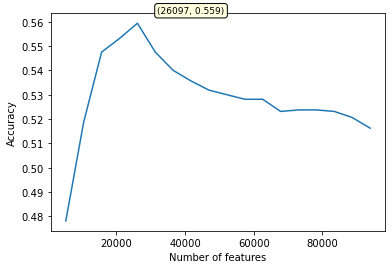

In [74]:
plot_features_vs_accuracy(feature_number, accuracies)

we see that we perform better when we have singular words as features, so we will stick with:

Pipeline([<br>
            ('vectorizer', CountVectorizer(ngram_range=(1, 1), max_features = 3000)),<br>
            ('classifier', MultinomialNB())<br>
        ])


## Experimenting with max_features argument combined with stop_words = {'english'}


In [75]:
def vectorizer_ngram_stopwords(from_, to_,vectorizer):
    feature_number = []
    accuraccies = []
    
    bow_pipeline = Pipeline([
        ('vectorizer', vectorizer(ngram_range=(from_, to_), stop_words='english')),
        ('classifier', MultinomialNB())
    ])
    
    bow_pipeline.fit(X_train, y_train)
    
    
    num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
    print("this many features were found: ", num_features, "\n")
    
    for features in [k for k in [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]]:
        number =features*num_features//100
        bow_pipeline = Pipeline([
            ('vectorizer', vectorizer(ngram_range=(from_, to_), max_features = number, stop_words='english')),
            ('classifier', MultinomialNB())
        ])
        
        bow_pipeline.fit(X_train, y_train)
        
        # acc = model_evaluation(bow_pipeline)
        y_pred = bow_pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        feature_number.append(number)
        accuraccies.append(acc)
        print(f"{number} features ({features}%) -> Accuracy: {acc}")

        print("")
    return [feature_number,accuraccies]

In [76]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1,CountVectorizer)

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.5975

1380 features (10%) -> Accuracy: 0.7625

2071 features (15%) -> Accuracy: 0.810625

2761 features (20%) -> Accuracy: 0.816875

3451 features (25%) -> Accuracy: 0.81875

4142 features (30%) -> Accuracy: 0.8225

4832 features (35%) -> Accuracy: 0.8225

5522 features (40%) -> Accuracy: 0.816875

6213 features (45%) -> Accuracy: 0.813125

6903 features (50%) -> Accuracy: 0.81125

7593 features (55%) -> Accuracy: 0.80875

8284 features (60%) -> Accuracy: 0.805

8974 features (65%) -> Accuracy: 0.805

9664 features (70%) -> Accuracy: 0.803125

10355 features (75%) -> Accuracy: 0.800625

11045 features (80%) -> Accuracy: 0.8

11735 features (85%) -> Accuracy: 0.798125

12426 features (90%) -> Accuracy: 0.794375



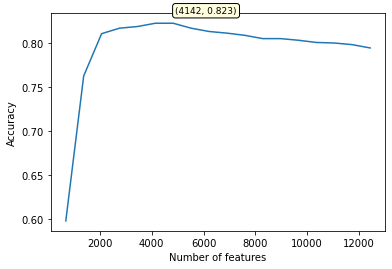

In [77]:
plot_features_vs_accuracy(feature_number, accuracies)

for 4142 features (30%) and 4832 features (35%) we got accuracy=0.8225 so increase by 3%<br>
maybe with other ranges?

In [78]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2,CountVectorizer)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.82625

9640 features (10%) -> Accuracy: 0.82

14460 features (15%) -> Accuracy: 0.819375

19280 features (20%) -> Accuracy: 0.819375

24100 features (25%) -> Accuracy: 0.81625

28920 features (30%) -> Accuracy: 0.8075

33740 features (35%) -> Accuracy: 0.8

38560 features (40%) -> Accuracy: 0.7975

43380 features (45%) -> Accuracy: 0.791875

48200 features (50%) -> Accuracy: 0.786875

53020 features (55%) -> Accuracy: 0.78375

57840 features (60%) -> Accuracy: 0.780625

62660 features (65%) -> Accuracy: 0.780625

67480 features (70%) -> Accuracy: 0.78

72300 features (75%) -> Accuracy: 0.778125

77120 features (80%) -> Accuracy: 0.775625

81940 features (85%) -> Accuracy: 0.775

86760 features (90%) -> Accuracy: 0.779375



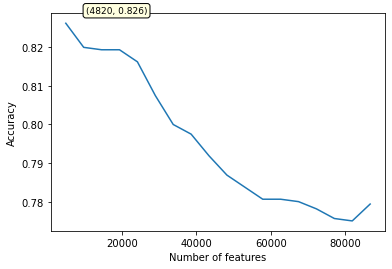

In [79]:
plot_features_vs_accuracy(feature_number, accuracies)

the best accuracy we have ever got and it's for 5% of all features.<br>
we can suspect that the most words are single words + it's around 4000/5000 words,<br> so the same number 
as we got in the previous example, that included only single words

In [ ]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(2,2,CountVectorizer)

this many features were found:  82594 

4129 features (5%) -> Accuracy: 0.606875

8259 features (10%) -> Accuracy: 0.64625

12389 features (15%) -> Accuracy: 0.648125

16518 features (20%) -> Accuracy: 0.6475

20648 features (25%) -> Accuracy: 0.650625

24778 features (30%) -> Accuracy: 0.650625

28907 features (35%) -> Accuracy: 0.649375

33037 features (40%) -> Accuracy: 0.650625

37167 features (45%) -> Accuracy: 0.649375

41297 features (50%) -> Accuracy: 0.645625

45426 features (55%) -> Accuracy: 0.6475

49556 features (60%) -> Accuracy: 0.65

53686 features (65%) -> Accuracy: 0.65125



In [ ]:
plot_features_vs_accuracy(feature_number, accuracies)

again, the model needs single words to perform

## TF-IDF (Term Frequency-Inverse Document Frequency)
Weighs word frequency by how common it is across all documents.<br>
Multiplies two values:
<li>TF (Term Frequency) = Frequency of a term in a document.
<li>IDF (Inverse Document Frequency) = Inverse of how many documents contain the term.
<br>
Reduces the impact of common but less informative words, but ignores word order.

In [85]:
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

tfidf_pipeline.fit(X_train, y_train)

model_evaluation(tfidf_pipeline)


 Model Performance:
              precision    recall  f1-score   support

         fun       0.93      0.38      0.54       231
   happiness       0.49      0.95      0.65       294
        hate       0.88      0.56      0.68       229
     neutral       0.60      1.00      0.75       258
     sadness       0.89      0.51      0.64       229
    surprise       0.00      0.00      0.00       115
       worry       0.74      0.72      0.73       244

    accuracy                           0.65      1600
   macro avg       0.65      0.59      0.57      1600
weighted avg       0.69      0.65      0.62      1600

Accuracy: 0.651875


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

let's also see how does this vectorizer perform with different ngram_range/max_features values

In [91]:
vectorizer_ngram(1,1, TfidfVectorizer)

this many features were found:  14101 

705 features (5%) -> Accuracy: 0.523125

1410 features (10%) -> Accuracy: 0.70875

2115 features (15%) -> Accuracy: 0.755

2820 features (20%) -> Accuracy: 0.75875

3525 features (25%) -> Accuracy: 0.755625

4230 features (30%) -> Accuracy: 0.753125

4935 features (35%) -> Accuracy: 0.745625

5640 features (40%) -> Accuracy: 0.735

6345 features (45%) -> Accuracy: 0.726875

7050 features (50%) -> Accuracy: 0.7175

7755 features (55%) -> Accuracy: 0.70625

8460 features (60%) -> Accuracy: 0.69875

9165 features (65%) -> Accuracy: 0.69125

9870 features (70%) -> Accuracy: 0.684375

10575 features (75%) -> Accuracy: 0.676875

11280 features (80%) -> Accuracy: 0.669375

11985 features (85%) -> Accuracy: 0.66625

12690 features (90%) -> Accuracy: 0.663125



worse than for the first vectorizer, let's see with other ngram_values

In [92]:
vectorizer_ngram(1,2, TfidfVectorizer)

this many features were found:  118489 

5924 features (5%) -> Accuracy: 0.694375

11848 features (10%) -> Accuracy: 0.689375

17773 features (15%) -> Accuracy: 0.66625

23697 features (20%) -> Accuracy: 0.644375

29622 features (25%) -> Accuracy: 0.638125

35546 features (30%) -> Accuracy: 0.623125

41471 features (35%) -> Accuracy: 0.609375

47395 features (40%) -> Accuracy: 0.5975

53320 features (45%) -> Accuracy: 0.5925

59244 features (50%) -> Accuracy: 0.584375

65168 features (55%) -> Accuracy: 0.578125

71093 features (60%) -> Accuracy: 0.57375

77017 features (65%) -> Accuracy: 0.57

82942 features (70%) -> Accuracy: 0.56625

88866 features (75%) -> Accuracy: 0.5625

94791 features (80%) -> Accuracy: 0.560625

100715 features (85%) -> Accuracy: 0.554375

106640 features (90%) -> Accuracy: 0.550625



In [93]:
vectorizer_ngram(2,2, TfidfVectorizer)

this many features were found:  104388 

5219 features (5%) -> Accuracy: 0.474375

10438 features (10%) -> Accuracy: 0.518125

15658 features (15%) -> Accuracy: 0.5375

20877 features (20%) -> Accuracy: 0.535625

26097 features (25%) -> Accuracy: 0.539375

31316 features (30%) -> Accuracy: 0.530625

36535 features (35%) -> Accuracy: 0.5225

41755 features (40%) -> Accuracy: 0.52

46974 features (45%) -> Accuracy: 0.52125

52194 features (50%) -> Accuracy: 0.51875

57413 features (55%) -> Accuracy: 0.51625

62632 features (60%) -> Accuracy: 0.515

67852 features (65%) -> Accuracy: 0.515625

73071 features (70%) -> Accuracy: 0.514375

78291 features (75%) -> Accuracy: 0.515

83510 features (80%) -> Accuracy: 0.51625

88729 features (85%) -> Accuracy: 0.513125

93949 features (90%) -> Accuracy: 0.51375



In [94]:
vectorizer_ngram(2,3, TfidfVectorizer)

this many features were found:  285115 

14255 features (5%) -> Accuracy: 0.49625

28511 features (10%) -> Accuracy: 0.51

42767 features (15%) -> Accuracy: 0.51875

57023 features (20%) -> Accuracy: 0.511875

71278 features (25%) -> Accuracy: 0.50625

85534 features (30%) -> Accuracy: 0.501875

99790 features (35%) -> Accuracy: 0.50375

114046 features (40%) -> Accuracy: 0.500625

128301 features (45%) -> Accuracy: 0.499375

142557 features (50%) -> Accuracy: 0.495625

156813 features (55%) -> Accuracy: 0.494375

171069 features (60%) -> Accuracy: 0.489375

185324 features (65%) -> Accuracy: 0.488125

199580 features (70%) -> Accuracy: 0.4875

213836 features (75%) -> Accuracy: 0.48875

228092 features (80%) -> Accuracy: 0.484375

242347 features (85%) -> Accuracy: 0.48375

256603 features (90%) -> Accuracy: 0.48375



as we can see, approach with this particular vectorizer is just worse

## More complex, pretrained methods - for fun :)

## BERT (Deep Contextual Embeddings) - way more computationally intensive
(Bidirectional Encoder Representations from Transformers)<br>
Uses transformer layers to capture word meaning in context.
<li>State-of-the-art for many NLP tasks, handles context well.
<li>Computationally expensive.

In [24]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def bert_embed(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

X_train_vec = bert_embed(list(X_train))
X_test_vec = bert_embed(list(X_test))

# Train and evaluate
model = GaussianNB()
model.fit(X_train_vec, y_train_enc)
y_pred = model.predict(X_test_vec)

print("\nBERT Model Performance:")
print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test_enc, y_pred))


ModuleNotFoundError: No module named 'transformers'

## For further investigation we will use the more simple method, BOW
BOW is very easy to understand and work with. Further in this document we will test other models than MultinominalNB. We will try to find a few models that conquer this task and try to ensamble than using various ensambling method (for example model voting). We will test Logistic Regression, Support Vector Machines (SVM), K-Nearest Neighbors (KNN) and some simple Neural Networks.